In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [36]:
path = "../data/brca/tcga/processed/estimate_scores_normal_tissue.csv"
normal = pd.read_csv(path)
normal["Tumor"] = 0
normal.head()

,Stromal_score,Immune_score,ESTIMATE_score,Tumor
A7-A0CE,-522.95,-580.55,-1103.49,0
A7-A0CH,239.09,-495.69,-256.59,0
A7-A0D9,-5.99,-907.22,-913.21,0
A7-A0DB,746.24,217.72,963.97,0
A7-A13E,-317.31,-875.75,-1193.06,0


In [37]:
normal.dtypes

Stromal_score     float64
Immune_score      float64
ESTIMATE_score    float64
Tumor               int64
dtype: object

In [38]:
path = "../data/brca/tcga/processed/GSE176078/ct_minor/prop_estimate_scores_primary_tumor_unstranded_subset_CID3586.csv"
tumor = pd.read_csv(path,sep=',')
tumor = tumor[["ID","Stromal_score","Immune_score","ESTIMATE_score"]]
tumor.set_index("ID", inplace=True)
tumor["Tumor"] = 1
tumor.head()

,Stromal_score,Immune_score,ESTIMATE_score,Tumor
ID,,,,
3C-AAAU,-711.41,-906.98,-1618.39,1
3C-AALI,122.66,511.24,633.91,1
3C-AALJ,400.91,539.25,940.16,1
3C-AALK,799.11,-3.53,795.58,1
4H-AAAK,1075.36,-46.96,1028.40,1


In [39]:
tumor.dtypes

Stromal_score     float64
Immune_score      float64
ESTIMATE_score    float64
Tumor               int64
dtype: object

In [47]:
df = pd.concat([normal, tumor])[["Immune_score","Tumor"]]
df.head()

,Immune_score,Tumor
A7-A0CE,-580.55,0
A7-A0CH,-495.69,0
A7-A0D9,-907.22,0
A7-A0DB,217.72,0
A7-A13E,-875.75,0


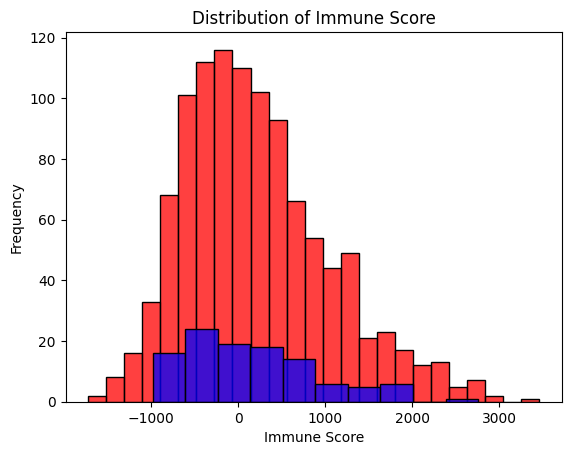

In [75]:
# plot the distribution of ESTIMATE_score from both dataframes
sns.histplot(data=tumor, x='Immune_score', color='red', label="Tumor")
sns.histplot(data=normal, x='Immune_score', color='blue', label="Normal")

# add labels and title to the plot
plt.xlabel('Immune Score')
plt.ylabel('Frequency')
plt.title('Distribution of Immune Score')
plt.show()

In [76]:
# perform Mann-Whitney U test
stat, pval = stats.mannwhitneyu(normal['Immune_score'], tumor['Immune_score'])

In [77]:
np.arange(-2000,4000,500)

array([-2000, -1500, -1000,  -500,     0,   500,  1000,  1500,  2000,
        2500,  3000,  3500])

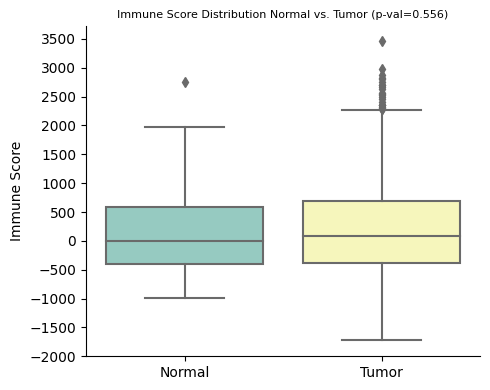

In [78]:
 _, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = sns.boxplot(data=df, 
                 x="Tumor",y="Immune_score",
                 palette="Set3",
                ax=ax)

ax.set_xticklabels(["Normal","Tumor"], fontsize=10)
ax.set_ylabel("Immune Score", fontsize=10)
ax.set_xlabel("")
ax.set_yticks(np.arange(-2000,4000,500))
title = f"Immune Score Distribution Normal vs. Tumor (p-val={round(pval,3)})"
ax.set_title(title, fontsize=8)
sns.despine(right=True)
#ax.set_ylim(y_lim)
plt.grid(False)
plt.tight_layout()
path = "../figures/TCGA/normal_tumor_immune_score.png"
plt.savefig(path, dpi=150, facecolor="w", bbox_inches="tight")
plt.show()
plt.close()

In [79]:
# calculate the t-test statistic and p-value
stat, pval = ttest_ind(normal['Immune_score'], tumor['Immune_score'])

# print the test statistic and p-value
print('T-test statistic:', stat)
print('p-value:', pval)


T-test statistic: -0.58486087952788
p-value: 0.5587528865817804


In [80]:
# perform Mann-Whitney U test
stat, pval = stats.mannwhitneyu(normal['Immune_score'], tumor['Immune_score'])

print('Mann-Whitney U test:')
print('Test statistic:', stat)
print('p-value:', pval)

# perform Spearman correlation test
# corr, pval = stats.spearmanr(normal['Immune_score'], tumor['Immune_score'], nan_policy="omit")

# print('Spearman correlation test:')
# print('Correlation coefficient:', corr)
# print('p-value:', pval)

Mann-Whitney U test:
Test statistic: 56584.0
p-value: 0.5559707044708488


In [74]:
import scipy.stats as stats
stat1, pval1 = stats.shapiro(normal['Immune_score'])
stat2, pval2 = stats.shapiro(tumor['Immune_score'])

print('Normality test for group 1:')
print('Test statistic:', stat1)
print('p-value:', pval1)
print('Normality test for group 2:')
print('Test statistic:', stat2)
print('p-value:', pval2)

# perform equality of variance test
stat, pval = stats.levene(normal['Immune_score'], tumor['Immune_score'])

print('Equality of variance test:')
print('Test statistic:', stat)
print('p-value:', pval)

Normality test for group 1:
Test statistic: 0.9456164240837097
p-value: 0.0002255601721117273
Normality test for group 2:
Test statistic: 0.9661205410957336
p-value: 3.974374303240217e-15
Equality of variance test:
Test statistic: 0.5853735291087285
p-value: 0.44436647329819856
